## A. Import Library

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

## B. Import Data

In [6]:
def populate_raw_data(directory:str="well_data/") -> pd.DataFrame:     # Put this function on script
    raw_data = pd.DataFrame()
    for well_data in os.listdir(directory):
        raw_data = pd.concat([raw_data,pd.read_csv(directory+well_data)],
                             axis=0,
                             ignore_index=True)
    return raw_data

In [7]:
raw_data = populate_raw_data()

In [28]:
def split_well_train_test(data:pd.DataFrame, well_name:str):
    data_train_unclean = data[data["Well Name"]!=well_name]
    data_test_unclean = data[data["Well Name"]==well_name]
    
    return data_train_unclean, data_test_unclean

In [29]:
data_train, data_test = split_well_train_test(data=raw_data, well_name="CHURCHMAN BIBLE")

In [35]:
data_train.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,CSiS,A1 SH,NOLAN,2853.5,106.813,0.533,9.339,15.222,3.500,1,1.000
1,FSiS,A1 SH,NOLAN,2854.0,100.938,0.542,8.857,15.313,3.416,1,0.977
2,FSiS,A1 SH,NOLAN,2854.5,94.375,0.553,7.097,14.583,3.195,1,0.955
3,FSiS,A1 SH,NOLAN,2855.0,89.813,0.554,7.081,14.110,2.963,1,0.932
4,FSiS,A1 SH,NOLAN,2855.5,91.563,0.560,6.733,13.189,2.979,1,0.909


## C. Univariate Analysis 

In [45]:
sns.set_style('darkgrid')

### Facies

In [10]:
facies_colors_pallete = {'SS':'#F4D03F', 'CSiS':'#F5B041', 'FSiS':'#DC7633','SiSh':'#6E2C00',
       'MS':'#1B4F72', 'WS':'#2E86C1', 'D':'#AED6F1', 'PS':'#A569BD', 'BS':'#196F3D'}

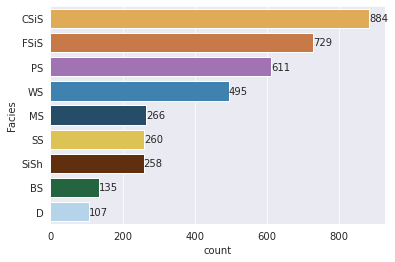

In [49]:
ax = sns.countplot(data=data_train, y='Facies',
              order=data_train['Facies'].value_counts().index,
              palette=facies_colors_pallete)
ax.bar_label(ax.containers[0])
plt.show()

the count plot show us that there are variative facies in the raw dataset. The most abudant facies is the CSiS (Coarse Siltstone), while the least facies is D (Dolomite)

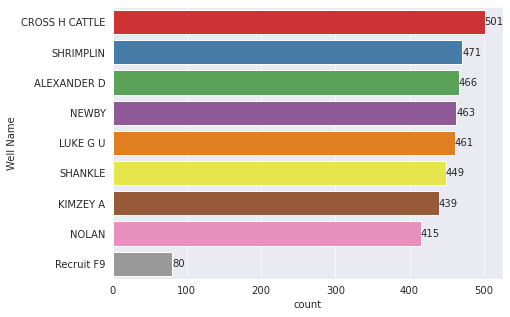

In [76]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(data=data_train, y='Well Name',
              order=data_train['Well Name'].value_counts().index,
              palette=sns.color_palette("Set1", 10))
ax.bar_label(ax.containers[0])
plt.show()

### Formation

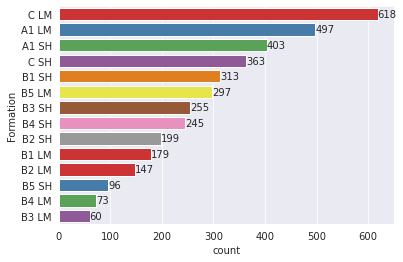

In [50]:
ax = sns.countplot(data=data_train, y='Formation',
              order=data_train['Formation'].value_counts().index,
              palette=sns.color_palette("Set1", 10))
ax.bar_label(ax.containers[0])
plt.show()

the count plot also show us that there are variative amount of formation in raw data, the most abudant formation is C LM and the least is B3 LM

### Well Name

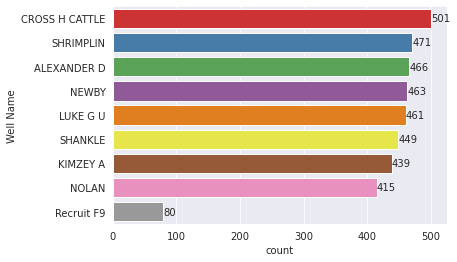

In [51]:
ax = sns.countplot(data=data_train, y='Well Name',
              order=data_train['Well Name'].value_counts().index,
              palette=sns.color_palette("Set1", 10))
ax.bar_label(ax.containers[0])
plt.show()

the well name count plot show that well **Recruit F9** has the smallest amount of data compare to another well data

### Depth